# Classification d'aliments par CNN
Ce notebook présente un pipeline de classification d'aliments à partir de données tabulaires ou d'images, selon la disponibilité.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os

ModuleNotFoundError: No module named 'tensorflow'

## 1. Chargement et préparation des données
Adaptez cette cellule selon que vous disposez d'images ou de données tabulaires.

In [ ]:
# Exemple pour données tabulaires
try:
    df = pd.read_csv('../cleaned_food_wastage_data.csv')
    print('Données chargées:', df.shape)
except Exception as e:
    print('Erreur de chargement:', e)

# Encodage
df['type_code'] = df['type_of_food'].astype('category').cat.codes
X = df[['quantity_of_food', 'quantity_squared', 'quantity_log']].values
y = df['type_code'].values

# Séparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Données chargées: (1782, 14)


## 2. Construction et entraînement du modèle CNN (adapté pour tabulaire)

In [ ]:
# Reshape pour CNN
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1, 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1, 1)
n_classes = len(np.unique(y))

model = Sequential([
    Conv2D(32, (1,1), activation='relu', input_shape=(X_train.shape[1],1,1)),
    MaxPooling2D((1,1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

c:\Users\Dell\Desktop\projet problem solving 2\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.1885 - loss: 17309.5977 - val_accuracy: 0.2035 - val_loss: 2289.5791
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1699 - loss: 6900.0259 - val_accuracy: 0.1930 - val_loss: 1630.0424
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2130 - loss: 2240.6211 - val_accuracy: 0.2035 - val_loss: 146.5024
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2512 - loss: 76.3993 - val_accuracy: 0.2035 - val_loss: 1.6081
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2671 - loss: 1.6061 - val_accuracy: 0.2035 - val_loss: 1.6061
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2551 - loss: 1.6037 - val_accuracy: 0.2035 - val_loss: 1.6043
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2521 - loss: 1.6004 - val_accuracy: 0.2035 - val_loss: 1.6027
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2480 - loss: 1.5986 - val_a

## 3. Évaluation du modèle

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy: 0.23529411764705882
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.00      0.00      0.00        73
           2       0.00      0.00      0.00        57
           3       0.24      1.00      0.38        84
           4       0.00      0.00      0.00        49

    accuracy                           0.24       357
   macro avg       0.05      0.20      0.08       357
weighted avg       0.06      0.24      0.09       357



c:\Users\Dell\Desktop\projet problem solving 2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\Desktop\projet problem solving 2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\Desktop\projet problem solving 2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

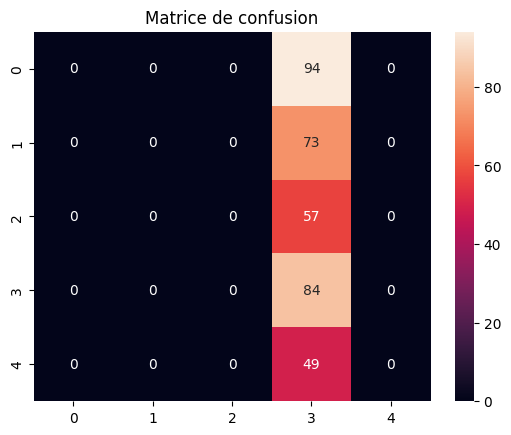

In [ ]:
y_pred = np.argmax(model.predict(X_test_cnn), axis=1)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matrice de confusion')
plt.show()

## 4. Sauvegarde du modèle

In [ ]:
model.save('cnn_model.h5')
print('Modèle sauvegardé sous cnn_model.h5')

Modèle sauvegardé sous cnn_model.h5
